# Ecualización localizada del histograma

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ecualización global

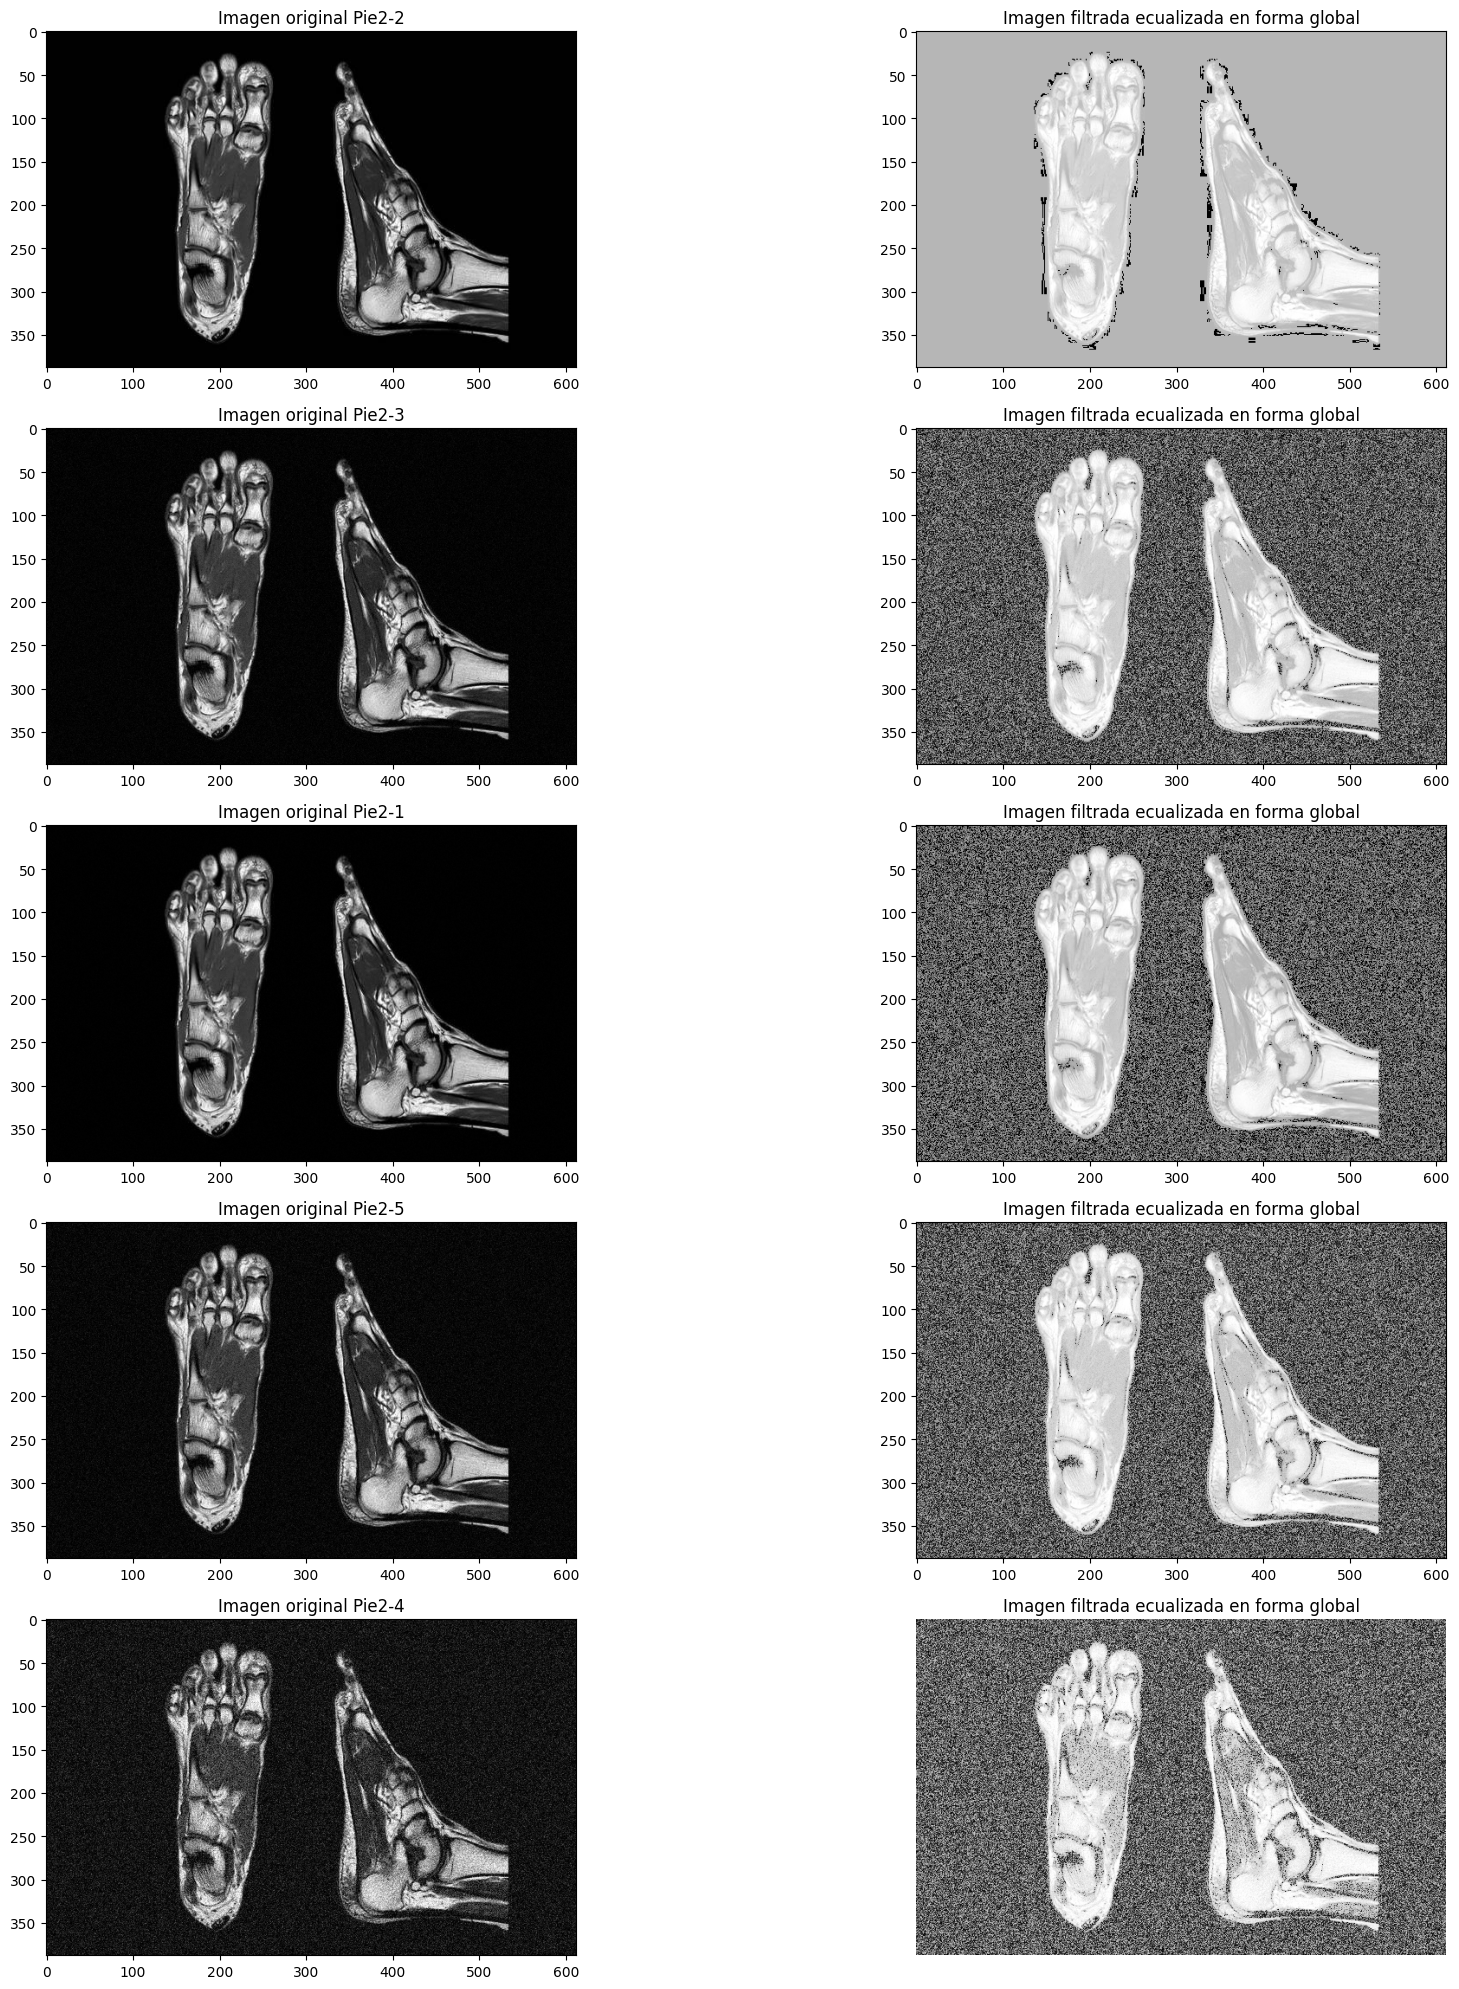

In [11]:
img_dir = 'PAIByB-2'
output_dir = 'eq_hist_global_img'
img_paths = os.listdir(img_dir)
fig, axs = plt.subplots(len(img_paths), 2, figsize=(20,20))

for i, img_name in enumerate(img_paths):
    raw_name = img_name.split('.')[0]
    raw_img = cv2.imread(os.path.join(img_dir, img_name), cv2.IMREAD_GRAYSCALE)
    img_eq_glob = cv2.equalizeHist(raw_img)
    cv2.imwrite(os.path.join(output_dir, f"{raw_name}_eq.png"), img_eq_glob)
    
    axs[i, 0].imshow(raw_img, cmap='gray', vmin=0, vmax=255)
    axs[i, 0].set_title(f'Imagen original {raw_name}')
    axs[i, 1].imshow(img_eq_glob, cmap='gray', vmin=0, vmax=255)
    axs[i, 1].set_title('Imagen filtrada ecualizada en forma global')

plt.axis('off')
plt.tight_layout()
plt.show()

## Ecualización local

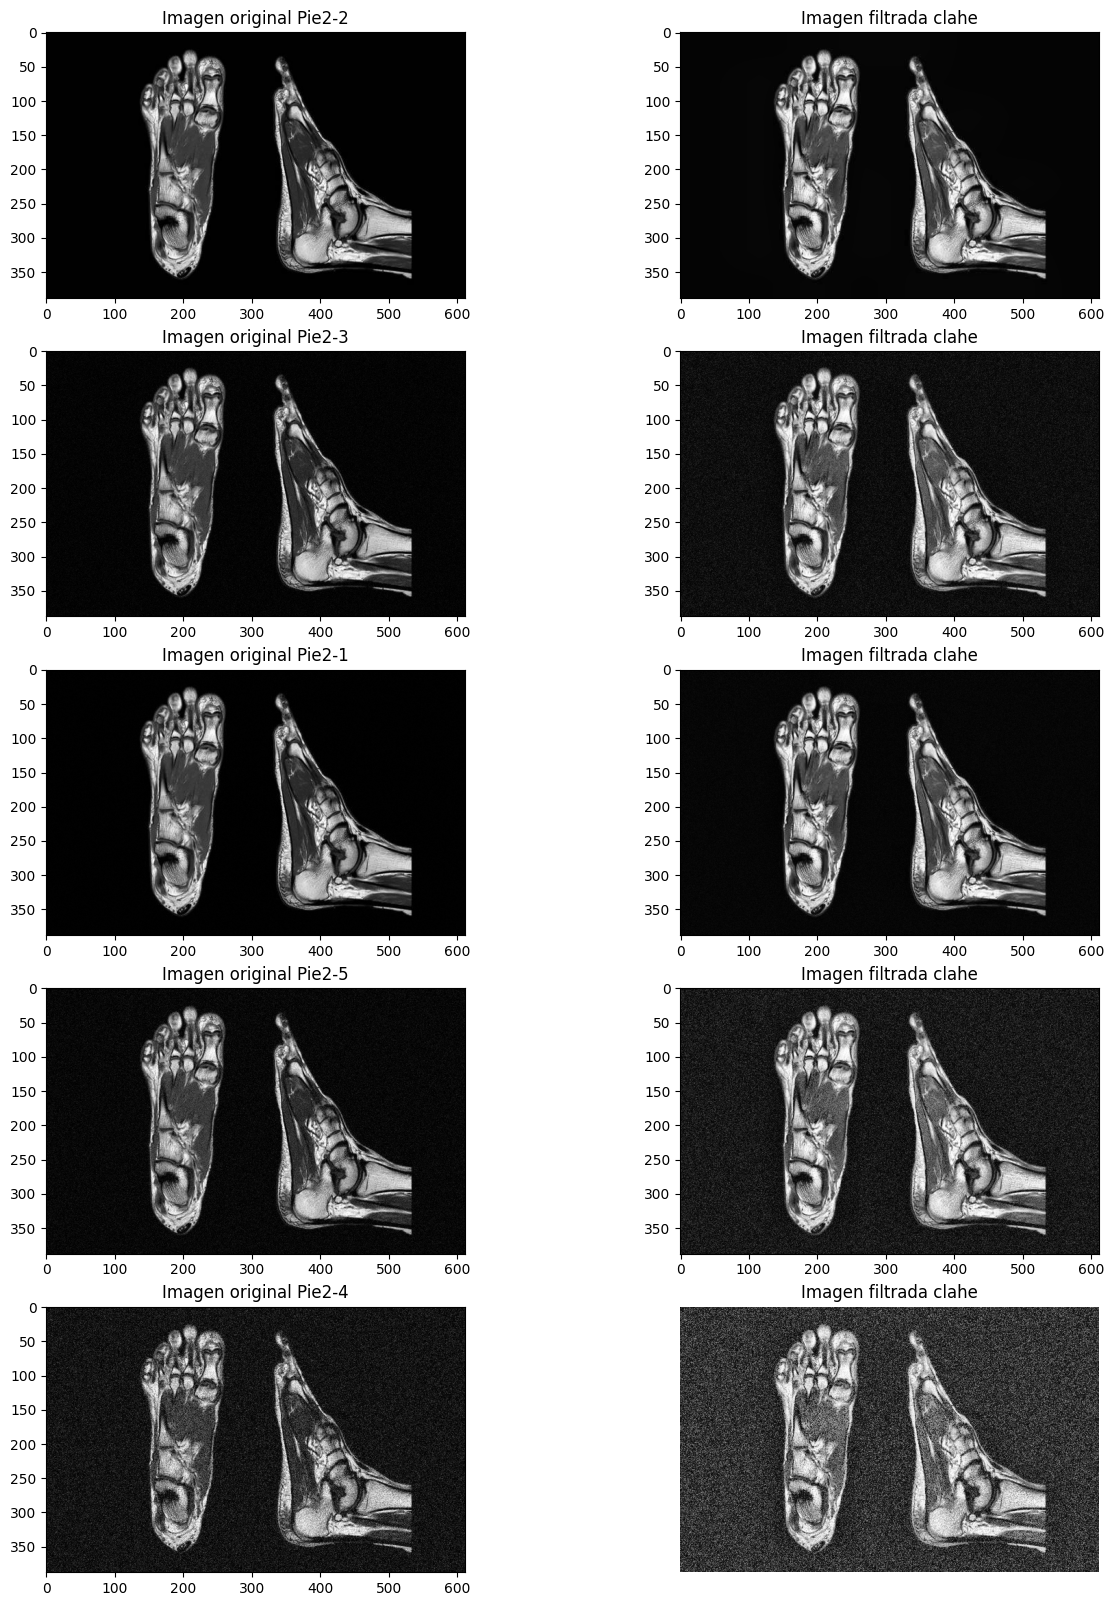

In [18]:
img_dir = 'PAIByB-2'
output_dir = 'clahe_images'
img_paths = os.listdir(img_dir)
fig, axs = plt.subplots(len(img_paths), 2, figsize=(15,20))

for i, img_name in enumerate(img_paths):
    raw_name = img_name.split('.')[0]
    raw_img = cv2.imread(os.path.join(img_dir, img_name), cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(raw_img)
    cv2.imwrite(os.path.join(output_dir, f"{raw_name}_clahe.png"), img_clahe)

    axs[i, 0].imshow(raw_img, cmap='gray', vmin=0, vmax=255)
    axs[i, 0].set_title(f'Imagen original {raw_name}')
    axs[i, 1].imshow(img_clahe, cmap='gray', vmin=0, vmax=255)
    axs[i, 1].set_title('Imagen filtrada clahe')

plt.axis('off')
plt.show()

Vamos a probar distintas combinaciones de clip y gridsize

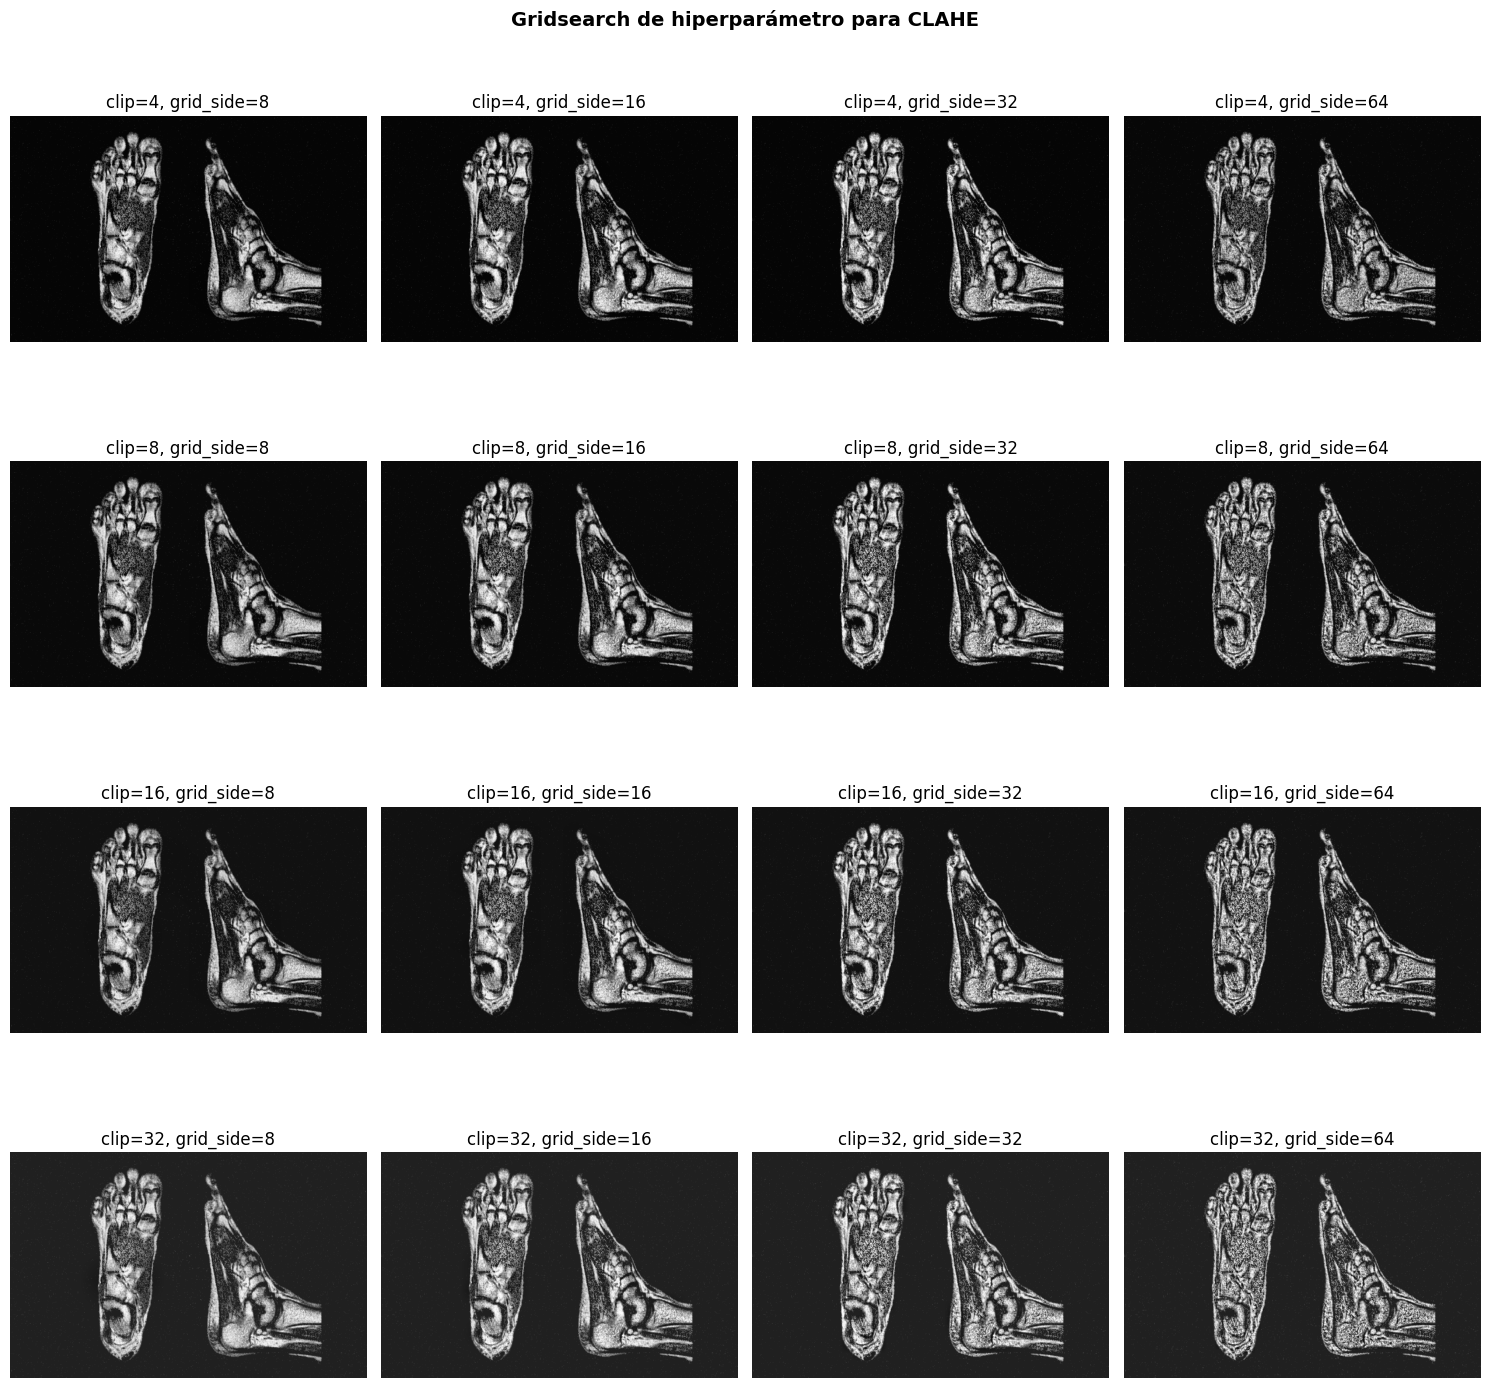

In [11]:
cliplimits = [2**i for i in range(2, 6)]
grid_sides = [2**i for i in range(3, 7)]

fig, axs = plt.subplots(nrows=len(cliplimits), ncols=len(grid_sides), figsize=(15, 15))

for i, clip in enumerate(cliplimits):
    for j, grid_side in enumerate(grid_sides):
        clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(grid_side, grid_side))
        img_clahe = clahe.apply(raw_img)
        axs[i, j].imshow(img_clahe, cmap='gray', vmin=0, vmax=255)
        axs[i, j].axis('off')
        axs[i, j].set_title(f'{clip=}, {grid_side=}')

fig.suptitle('Gridsearch de hiperparámetro para CLAHE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()